In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
%matplotlib notebook

In [3]:
def odefunc(u_1, t, a):
    Nx = len(u_1)-1
    dudt = np.zeros(Nx+1)
    F = a[0]
    dx = a[1]
#     print('F', F)
#     print('dx',dx)
    # Compute u at inner mesh points
    for i in range(1, Nx):
        dudt[0]=(u_1[Nx] - 2*u_1[0] + u_1[1])*F/dx**2
        dudt[i] = (u_1[i-1] - 2*u_1[i] + u_1[i+1])*F/dx**2
        dudt[Nx]=(u_1[Nx-1] - 2*u_1[Nx] + u_1[0])*F/dx**2
        #for i in range(0, Nx+1):
         #   u_1[i] = u_1[i] + dudt[i]

    return dudt


In [4]:
L = 1
dT = .1
Nx = 300
x = np.linspace(0, L, Nx+1)    # mesh points in space
dx = x[1] - x[0]
F = 0.00002
a = [F,dx] 
T = 10
t = np.arange(0, T, dT)    # mesh points in time
beta = 100
alpha = 1

In [5]:
# Initial condition
u_1 = np.zeros(Nx+1) 

135
200
279


<IPython.core.display.Javascript object>


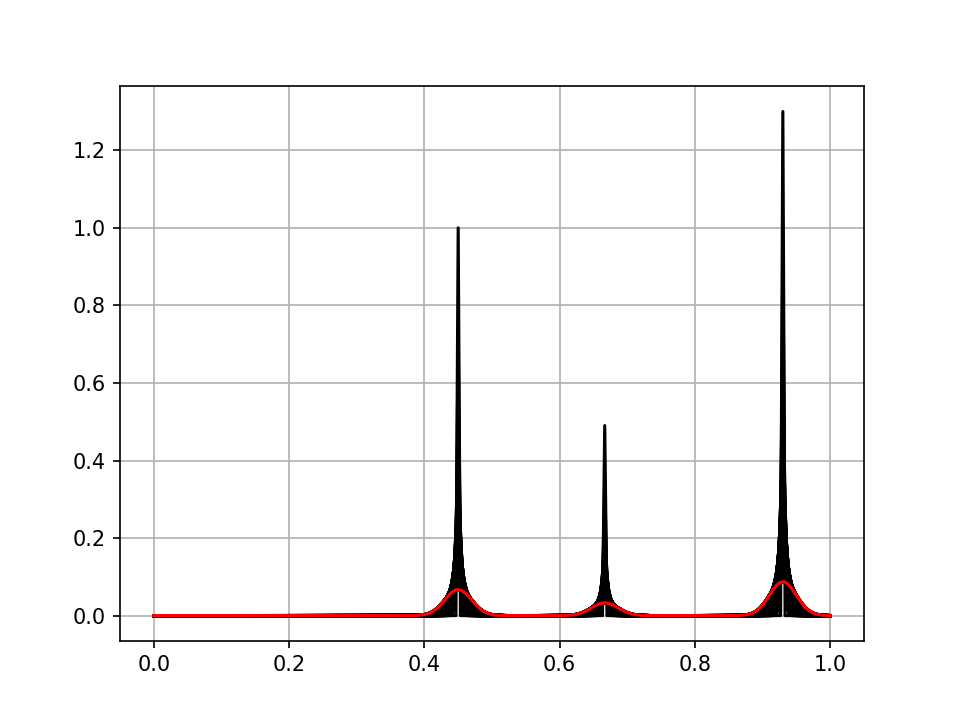

In [6]:
# Add a bump at xspike and integrate up to T
bump = 1
xspike = .45*L
ixspike = int(xspike/L*Nx); print(ixspike)
u_1[ixspike]+=bump

bump = .49
xspike = 2*L/3
ixspike = int(xspike/L*Nx); print(ixspike)
u_1[ixspike]+=bump

bump = 1.3
xspike = .93*L
ixspike = int(xspike/L*Nx); print(ixspike)
u_1[ixspike]+=bump

sol1 = odeint(odefunc, u_1, t, args = (a,))
plt.figure()
plt.plot(x, sol1.T,'k')
u_1 = sol1[-1,:]; #print(np.shape(u_1))
plt.plot(x, u_1,'r')
plt.grid(True)

75
270


<IPython.core.display.Javascript object>


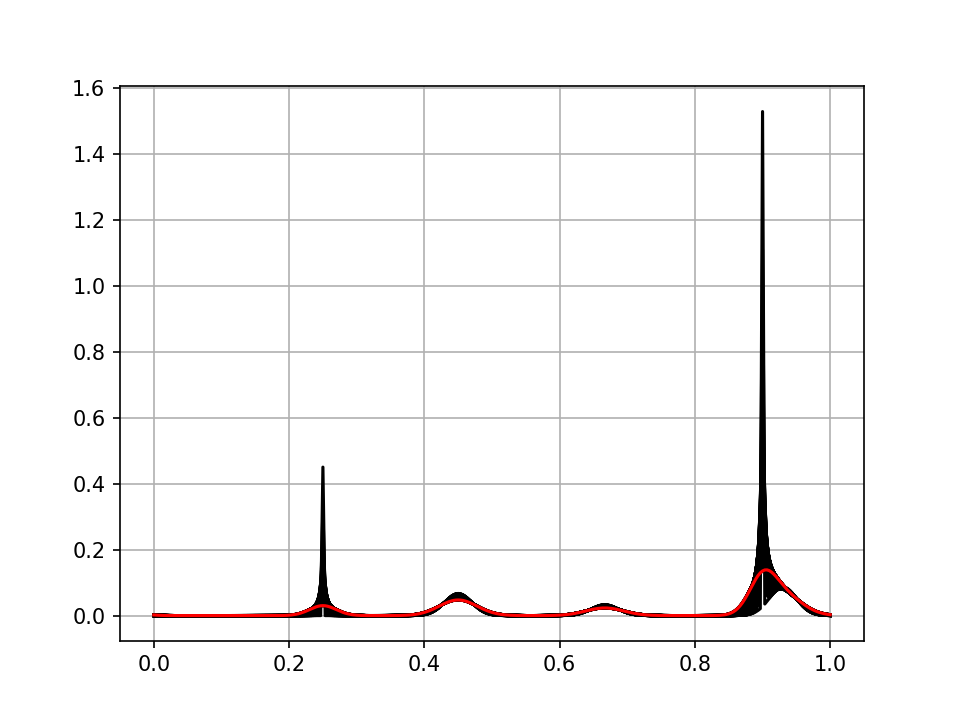

In [7]:
# Add a bump at xspike and integrate up to T
bump = .45
xspike = L/4
ixspike = int(xspike/L*Nx); print(ixspike)
u_1[ixspike]+=bump

bump = 1.5
xspike = .9*L
ixspike = int(xspike/L*Nx); print(ixspike)
u_1[ixspike]+=bump

sol2 = odeint(odefunc, u_1, t, args = (a,))
plt.figure()
plt.plot(x, sol2.T,'k')
u_1 = sol2[-1,:]; #print(np.shape(u_1))
plt.plot(x, u_1,'r')
plt.grid(True)

225
120
15


<IPython.core.display.Javascript object>


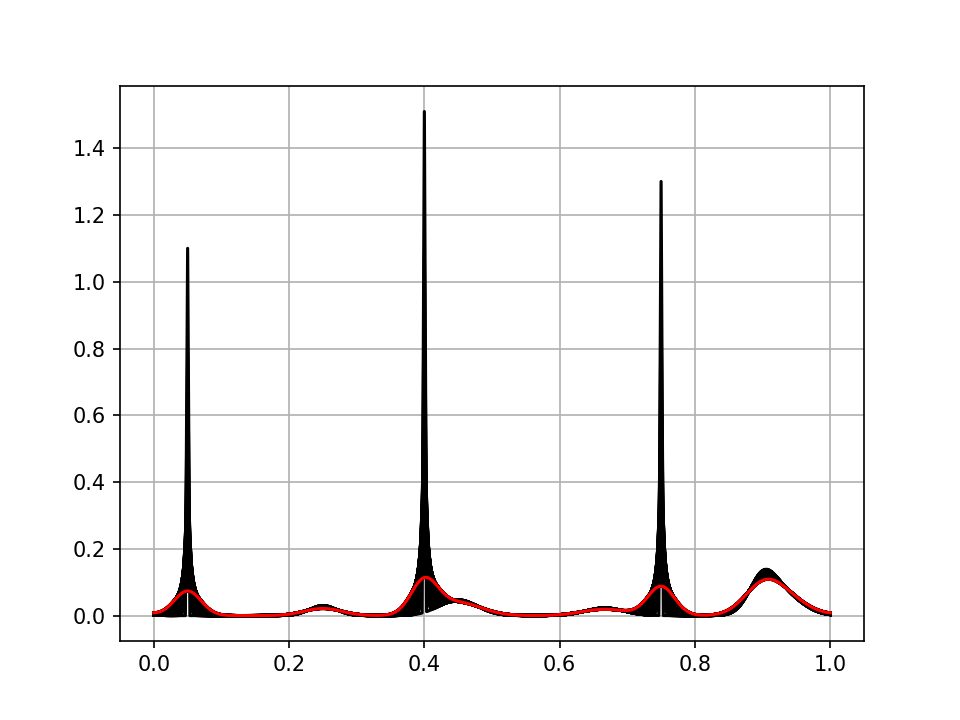

In [8]:
# Add a bump at xspike and integrate up to T
bump = 1.3
xspike = L*3/4
ixspike = int(xspike/L*Nx); print(ixspike)
u_1[ixspike]+=bump

bump = 1.5
xspike = .4*L
ixspike = int(xspike/L*Nx); print(ixspike)
u_1[ixspike]+=bump

bump = 1.1
xspike = .05*L
ixspike = int(xspike/L*Nx); print(ixspike)
u_1[ixspike]+=bump

sol3 = odeint(odefunc, u_1, t, args = (a,))
plt.figure()
plt.plot(x, sol3.T,'k')
u_1 = sol3[-1,:]; #print(np.shape(u_1))
plt.plot(x, u_1,'r')
plt.grid(True)

<IPython.core.display.Javascript object>


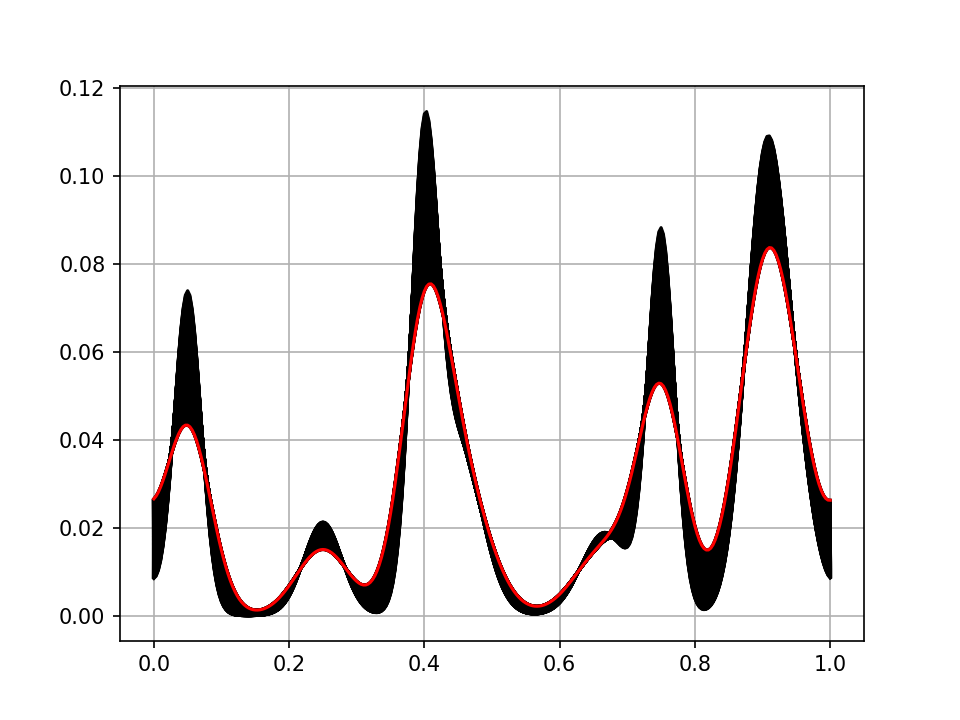

In [9]:
# Integrate up to a longer time
T = 20
t = np.arange(0, T, dT)    # mesh points in time
sol4 = odeint(odefunc, u_1, t, args = (a,))
plt.figure()
plt.plot(x, sol4.T,'k')
u_1 = sol4[-1,:]; #print(np.shape(u_1))
plt.plot(x, u_1,'r')
plt.grid(True)

500


<IPython.core.display.Javascript object>


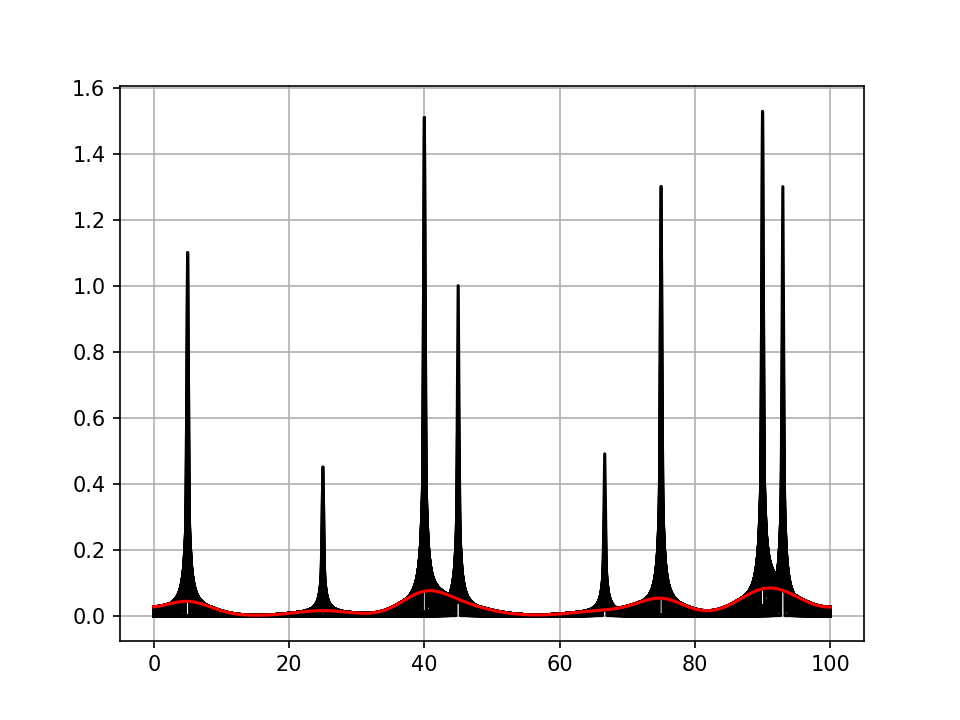

In [10]:
xnew = x*beta
dxnew = dx*beta
sol = np.vstack((sol1,sol2,sol3,sol4))*alpha
Ntimes,dummy = np.shape(sol); print(Ntimes)
plt.figure()
plt.plot(xnew, sol.T,'k')
u_1 = sol[-1,:]; #print(np.shape(u_1))
plt.plot(xnew, u_1,'r')
plt.grid(True)

In [11]:
print(np.shape(sol))
Ztot = np.diff(sol,axis=1)/dxnew
Z2tot = Ztot**2; print(np.shape(Z2tot))
Z2totSize = np.size(Z2tot)
Z2tot_long = np.reshape(Z2tot, Z2totSize)
print(np.shape(Z2tot_long))

(500, 301)
(500, 300)
(150000,)


95795
[92141  1484   535   306   211   134   106    78    60]
[0.         0.00166667 0.00333333 0.005      0.00666667 0.00833333
 0.01       0.01166667 0.01333333 0.015     ]
ratio =  1535.6833333333334


<IPython.core.display.Javascript object>


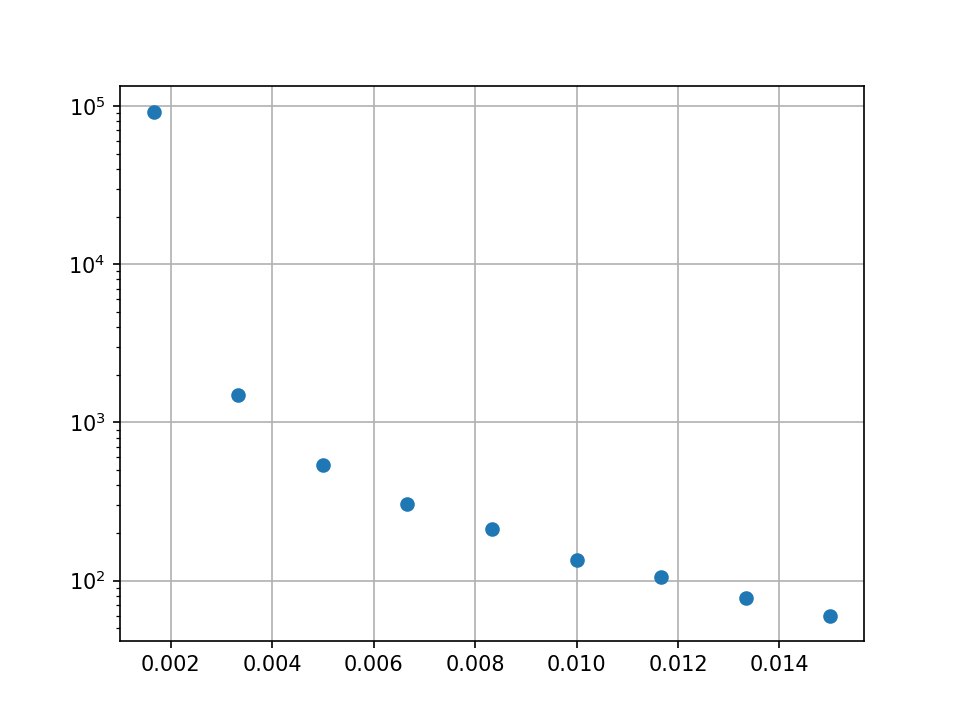

In [12]:
goodindicies = np.argwhere(Z2tot_long>.000001); print(len(goodindicies))
mybins = np.linspace(0,.015,10)
counts, bins = np.histogram(Z2tot_long[goodindicies],mybins)
print(counts)
print(bins)
print('ratio = ', counts[0]/counts[-1])
plt.figure()
plt.semilogy(bins[1:], counts, 'o')
plt.grid(True)